# Лаб. 1.2. Оптимизация вдоль направления
---
На практике задача оптимизации функции одной переменной решается только как подзадача при оптимизации функции нескольких переменных.

В этой лабораторной мы рассмотрим задачу оптимизации функции двух переменных, при оптимизации которой будем выбирать направление спуска и вдоль этого направления искать минимум функции.

In [ ]:
import numpy as np
np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

## Минимизируемые функции
---
В качестве эталонных функций рассмотрим функции:
1. Квадратическая функция
2. Эллиптическая функция
3. Функция Розенброка
4. Многоэкстремальная функция

In [ ]:
def quadr_fun(x):   # квадратическая функция
    return x[0]**2 + x[1]**2 - 3*x[0] - 6*x[1]
    # return x[0]**2 + x[1]**2

def ellipt_fun(x):   # квадратическая функция
    return x[0]**2 + 10*x[1]**4 - 3*x[0] - 6*x[1]

def rosenbrock_fun(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

def multi_fun(x):   # многоэкстремальная функция
    return (x[0]**2 + x[1]**2 - 11)**2 + (x[0] + x[1]**2 - 7)**2


r0 = (-4, 4)
print(quadr_fun(r0), ellipt_fun(r0), rosenbrock_fun(r0), multi_fun(r0))

## Одномерная оптимизация вдоль направления
---

In [ ]:
def make_1Dfun(f, r0, dr):
    def f1D(alfa, f=f, r0=r0, dr=dr):
        r0 = np.array(r0)
        dr = np.array(dr)
        alfa = np.array(alfa)
        xy_arr = r0.reshape((1, -1)) + alfa.reshape((-1, 1)) @ dr.reshape((1, -1))
        # r = r0 + alfa * dr
        return f(xy_arr.T)
    return f1D

In [ ]:
# построим график функции f(x,y) вдоль выбранного направления dr= (dx, dy)
# r0 = (-4, 4)
# dr = (1, -1)
r0 = (-4.0, 4.0)
dr = (1.0, -1.0)
# выбираем функцию и создаем 1-мерную функцию вдоль направления dr из точки r0
f = quadr_fun
# f = ellipt_fun
# f = rosenbrock_fun
# f = multi_fun
#f = ekly_fun
f1D = make_1Dfun(f, r0, dr)

# строим график созданной 1-мерной функции вдоль направления dr из точки r0
alfa_arr = np.arange(0, 7.1, 0.1)
plt.plot(alfa_arr, f1D(alfa_arr));

In [ ]:
r0, dr, alfa = np.array(r0), np.array(dr), np.array(alfa_arr)
xy_arr = r0.reshape((1, -1)) + alfa.reshape((-1, 1)) @ dr.reshape((1, -1))
xy_arr.shape, f(xy_arr.T).shape, f1D(alfa_arr).shape

In [ ]:
# """ антиградиентный спуск """
# def opt1D(f1, x0, alpha, epsg=0.1, maxiter=100):
#     dx = 1e-7
#     dfdx = (f1(x0 + dx) - f1(x0)) / dx
#     iter = 0
#     while abs(dfdx) > epsg:
#         x0 = x0 - alpha * dfdx
#         dfdx = (f1(x0 + dx) - f1(x0)) / dx
#         iter += 1
#         if iter > maxiter:
#             break

#     return x0, iter

In [ ]:
""" антиградиентный спуск v2 """
def opt1D(f1, x0, alpha, epsg=0.1, maxiter=100):
    dx = 1e-7
    # dfdx = (f1(x0 + dx) - f1(x0)) / dx
    dfdx = lambda x0: (f1(x0 + dx) - f1(x0)) / dx
    iter = 0
    while abs(dfdx(x0)) > epsg:
        x0 = x0 - alpha * dfdx(x0)
        # dfdx = (f1(x0 + dx) - f1(x0)) / dx
        iter += 1
        if iter > maxiter:
            break

    return x0, iter

#### Quadr

In [ ]:
# Quadr
# построим график функции f(x,y) вдоль выбранного направления dr= (dx, dy)
r0 = (-4, 4)
dr = (1, -1)

# выбираем функцию и создаем 1-мерную функцию вдоль направления dr из точки r0
f = quadr_fun
f1D = make_1Dfun(f, r0, dr)

# строим график созданной 1-мерной функции вдоль направления dr из точки r0
alfa_arr = np.arange(0, 7.1, 0.1)
plt.plot(alfa_arr, f1D(alfa_arr));

In [ ]:
xopt, iter = opt1D(f1D, 0.0, alpha=0.25)
dx = 1e-7
dfdx = (f1D(xopt + dx) - f1D(xopt)) / dx
xopt, dfdx, iter

#### Ellipt

In [ ]:
# Ellipt
# построим график функции f(x,y) вдоль выбранного направления dr= (dx, dy)
r0 = (-4, 4)
dr = (1, -1)

# выбираем функцию и создаем 1-мерную функцию вдоль направления dr из точки r0
f = ellipt_fun
f1D = make_1Dfun(f, r0, dr)

# строим график созданной 1-мерной функции вдоль направления dr из точки r0
alfa_arr = np.arange(0, 7.1, 0.1)
plt.plot(alfa_arr, f1D(alfa_arr));

In [ ]:
xopt, iter = opt1D(f1D, 0.0, alpha=0.0014)
dx = 1e-7
dfdx = (f1D(xopt + dx) - f1D(xopt)) / dx
xopt, dfdx, iter

#### Rosenbrock

In [ ]:
# Rosenbrock
# построим график функции f(x,y) вдоль выбранного направления dr= (dx, dy)
r0 = (-4, 4)
dr = (1, -1)

# выбираем функцию и создаем 1-мерную функцию вдоль направления dr из точки r0
f = rosenbrock_fun
f1D = make_1Dfun(f, r0, dr)

# строим график созданной 1-мерной функции вдоль направления dr из точки r0
alfa_arr = np.arange(0, 7.1, 0.1)
plt.plot(alfa_arr, f1D(alfa_arr));

In [ ]:
xopt, iter = opt1D(f1D, 0.0, alpha=0.04)
dx = 1e-7
dfdx = (f1D(xopt + dx) - f1D(xopt)) / dx
xopt, dfdx, iter

#### Multi

In [ ]:
# Multi
# построим график функции f(x,y) вдоль выбранного направления dr= (dx, dy)
r0 = (-4, 4)
dr = (1, -1)

# выбираем функцию и создаем 1-мерную функцию вдоль направления dr из точки r0
f = multi_fun
f1D = make_1Dfun(f, r0, dr)

# строим график созданной 1-мерной функции вдоль направления dr из точки r0
alfa_arr = np.arange(0, 7.1, 0.1)
plt.plot(alfa_arr, f1D(alfa_arr));

In [ ]:
xopt, iter = opt1D(f1D, 0.0, alpha=0.004)
dx = 1e-7
dfdx = (f1D(xopt + dx) - f1D(xopt)) / dx
xopt, dfdx, iter

#### Пример

In [ ]:
xopt, iter = opt1D(f1D, 0.0, alpha=0.02)
dx = 1e-7
dfdx = (f1D(xopt + dx) - f1D(xopt)) / dx
xopt, dfdx, iter

## Метод покоординатного спуска
---
Метод покоординатного спуска является одним из простейших методов многомерной оптимизации и неплохо справляется с поиском локального минимума функций с относительно гладким рельефом, поэтому знакомство с методами оптимизации лучше начинать именно с него.


Поиск экстремума ведется в направлении осей координат, т.е. в процессе поиска изменяется только одна координата. Таким образом, многомерная задача сводится к одномерной.

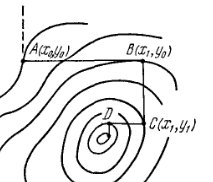

In [ ]:
# def coord2D(f, x0, maxiter=100):
#     pass

In [ ]:
def quadr_fun(x):   # квадратическая функция
    return x[0]**2 + x[1]**2 - 3*x[0] - 6*x[1]
    # return x[0]**2 + x[1]**2

def ellipt_fun(x):   # квадратическая функция
    return x[0]**2 + 10*x[1]**4 - 3*x[0] - 6*x[1]

def rosenbrock_fun(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

def multi_fun(x):   # многоэкстремальная функция
    return (x[0]**2 + x[1]**2 - 11)**2 + (x[0] + x[1]**2 - 7)**2


def make_1Dfun(f, r0, dr):
    def f1D(alfa, f=f, r0=r0, dr=dr):
        r0 = np.array(r0)
        dr = np.array(dr)
        r = r0 + alfa * dr
        return f(r)
    return f1D


""" антиградиентный спуск """
def opt1D(f1, x0, alpha, epsg=0.01, maxiter=100):
    dx = 1e-7
    dfdx = (f1(x0 + dx) - f1(x0)) / dx
    iter = 0
    while abs(dfdx) > epsg:
        x0 = x0 - alpha * dfdx
        dfdx = (f1(x0 + dx) - f1(x0)) / dx
        iter += 1
        if iter > maxiter:
            break

    return x0#, iter

def coord2D(f, r0, maxiter = 100, alpha = 0.01):
    dr = np.array([1, 0])
    iter = 0
    rlist = [r0]
    while iter < maxiter:
        if iter % 2 == 0:
            f1D = make_1Dfun(f, r0, dr)
            r0 = [r0[0] + opt1D(f1D, 0.0, alpha, maxiter=maxiter), r0[1]]
        else:
            f1D = make_1Dfun(f, r0, dr[::-1])
            r0 = [r0[0], r0[1] + opt1D(f1D, 0.0, alpha, maxiter=maxiter)]
        rlist.append(r0)
        iter += 1
    return rlist

## Оценка градиента (вектора частных производных)

In [ ]:
def eval_grad(f, x0, dx=1e-7):
    dfdx = (f((x0[0] + dx, x0[1])) - f(x0)) / dx
    dfdy = (f((x0[0], x0[1] + dx)) - f(x0)) / dx
    df = np.sqrt(dfdx**2 + dfdy**2)
    return df

#### Quadr

In [ ]:
f = quadr_fun
r0 = (-4, 4)
res = coord2D(f, r0, 100)

res_with_value_and_eval_grad = [[x[0], x[1], f(x), eval_grad(f, x)] for x in res]
print(np.round(res_with_value_and_eval_grad, 5))

#### Ellipt

In [ ]:
f = ellipt_fun
r0 = (-4, 4)
res = coord2D(f, r0, 100, 0.001)

res_with_value_and_eval_grad = [[x[0], x[1], f(x), eval_grad(f, x)] for x in res]
print(np.round(res_with_value_and_eval_grad, 5))

#### Rosenbrock

In [ ]:
f = rosenbrock_fun
r0 = (-4, 4)
res = coord2D(f, r0, 100)

res_with_value_and_eval_grad = [[x[0], x[1], f(x), eval_grad(f, x)] for x in res]
print(np.round(res_with_value_and_eval_grad, 5))

#### Multi

In [ ]:
f = multi_fun
r0 = (-4, 4)
res = coord2D(f, r0, 100, 0.001)

res_with_value_and_eval_grad = [[x[0], x[1], f(x), eval_grad(f, x)] for x in res]
print(np.round(res_with_value_and_eval_grad, 5))